# 1. Imports

In [171]:
# Add the project root to Python path
sys.path.append(os.path.abspath('..'))
print(sys.path)
import sys
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from diabetes_ensemble import config

df: pd.DataFrame = pd.read_csv(config.RAW_DATA_DIR / 'diabetes.csv')
df.head()

['/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/jared.thach/j/diabetes-ensemble/venv/lib/python3.10/site-packages', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble', '/Users/jared.thach/j/diabetes-ensemble']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 2. Exploratory Data Analysis (EDA)

In [70]:
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
import matplotlib.pyplot as plt

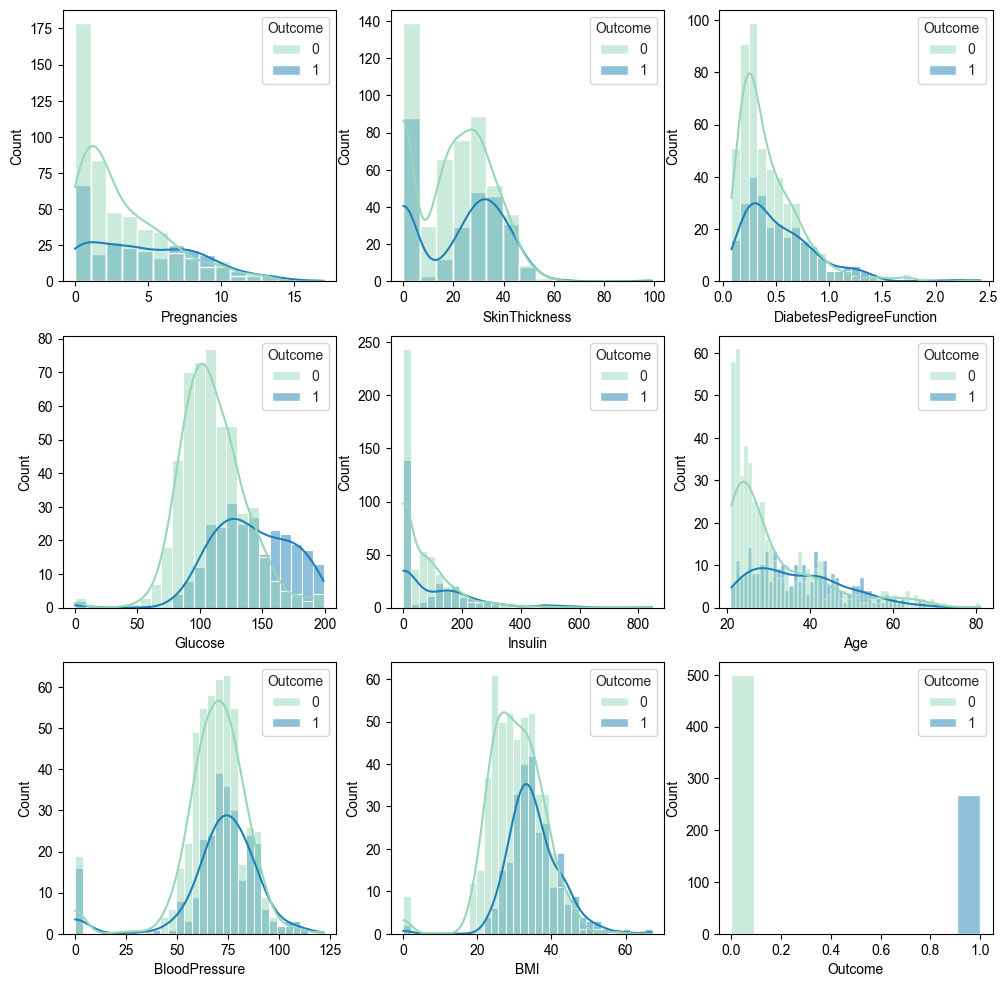

In [177]:
def generate_figure(data: pd.DataFrame, x_dim, y_dim, figsize=(4,4), plot_type='histplot'):
    fig, axes = plt.subplots(y_dim, x_dim, figsize=figsize)
    sns.set_style("white")
    sns.set_palette("bright")

    r, c = 0, 0
    for col in data.columns:
        if plot_type == 'histplot':
            # add extra granularity for 'Age' column
            if col == 'Age':
                sns.histplot(data=df, x=col, ax=axes[r,c], binwidth=1, hue='Outcome', palette="YlGnBu", kde=True)
            else:
                sns.histplot(data=df, x=col, ax=axes[r,c], hue='Outcome', palette="YlGnBu", kde=True)
        elif plot_type == 'boxplot':
                sns.boxplot(data=df, x=col, ax=axes[r,c], hue='Outcome', palette="YlGnBu", kde=True)
        r += 1
        if r > y_dim - 1:
            r = 0
            c += 1

    return fig, axes

fig1, axes1 = generate_figure(data=df, x_dim=3, y_dim=3, figsize=(12,12), plot_type='histplot');

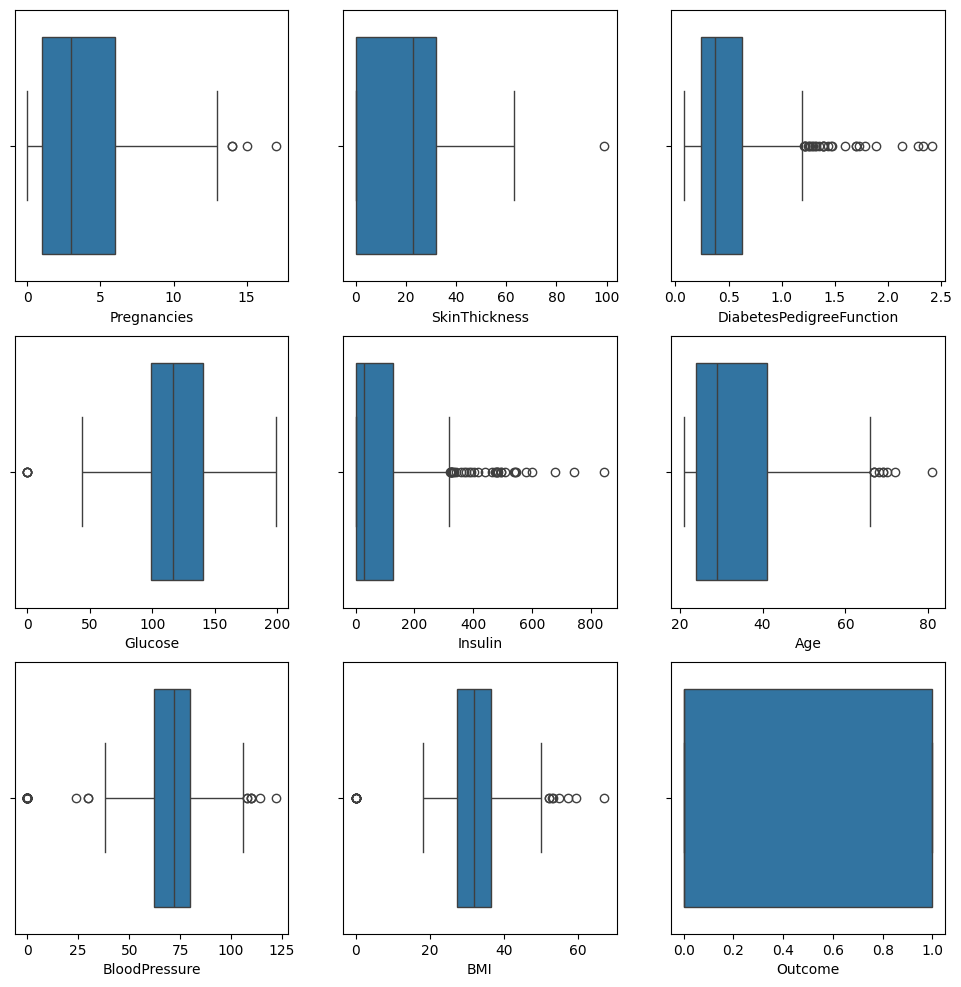

In [122]:
fig2, axes2 = generate_figure(data=df, x_dim=3, y_dim=3, figsize=(12,12), plot_type='boxplot');


<Axes: xlabel='Pregnancies'>

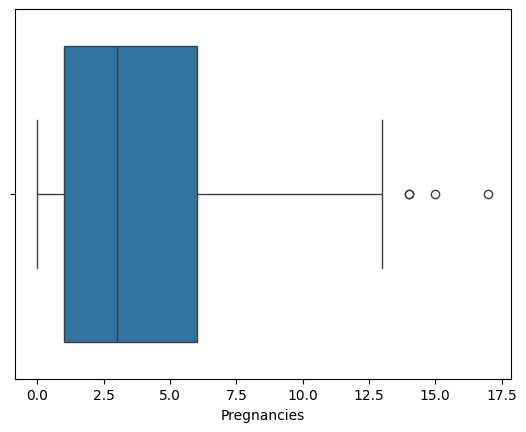

In [123]:
sns.boxplot(data=df, x='Pregnancies')

In [124]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Data Preprocessing

## 3a. Imputation

##### As we have observed from our initial `df.describe()` and from our `matplotlib` subplots, there are several features that have suggestively erroneous data of `0`. This applies to nearly all features, except for `Pregancies`, `DiabetesPedigreeFunction`, `Age`, and our target feature, `Outcome`.

Columns with likely erroneous `0` records:
- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

**Objective: impute the respective median value for each of these records with `0` in the mentioned columns.**

In [160]:
from sklearn.impute import SimpleImputer

# only impute values for the specific columns
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
medianImputer = SimpleImputer(missing_values=0, strategy='median')
imputed_np = medianImputer.fit_transform(df.loc[:, cols_to_impute])
imputed_df = pd.DataFrame(imputed_np, columns=cols_to_impute)
imputed_df.head()

# TODO: create a pipeline for preprocessing, beginning with median data imputation
# TODO: save the fit_transform result as a new DF


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


**Objective: combine the newly imputed features with the non-imputed features**

In [161]:
cols_not_to_impute = [col for col in df.columns if col not in cols_to_impute]
not_imputed_df = df.loc[:, cols_not_to_impute]
clean_df = pd.merge(imputed_df, not_imputed_df, left_index=True, right_index=True)

In [ ]:
# observe the newly combined dataset: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' should no longer have 0 minimums
clean_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208,3.845052,0.471876,33.240885,0.348958
std,30.438286,12.096642,8.791221,86.383060,6.875177,3.369578,0.331329,11.760232,0.476951
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.000000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,25.000000,121.500000,27.500000,1.000000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,29.000000,125.000000,32.300000,3.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,6.000000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,17.000000,2.420000,81.000000,1.000000


## 3b. Scaling

Because some of our data's features follow a non-normal relationship, we will attempt to scale the data for better model training. Here, we will use a `QuantileTransformer` to scale the date more closely towards the normal distribution.

In [195]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal', random_state=99)
# scaling all columns except for target feature
X_cleaned_scaled_np = scaler.fit_transform(clean_df.iloc[:, :-1])
X_cleaned_scaled_df = pd.DataFrame(X_cleaned_scaled_np, columns=df.columns[:-1])
cleaned_scaled_df = pd.merge(X_cleaned_scaled_df, clean_df.iloc[:, -1], left_index=True, right_index=True)
cleaned_scaled_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.873569,-0.025322,0.852495,0.000000,0.239380,0.666564,0.678858,1.220640,1
1,-1.335178,-0.559592,-0.012660,0.000000,-0.799083,-0.731217,-0.059586,0.139710,0
2,1.708508,-0.731217,-0.012660,0.000000,-1.434020,1.096804,0.788098,0.203961,1
3,-1.167475,-0.559592,-0.799083,-0.947401,-0.567010,-0.731217,-1.258282,-5.199338,0
4,0.574460,-2.405245,0.852495,0.965625,1.447963,-5.199338,2.903113,0.269066,1


# 4. Split Data

In [183]:
from sklearn.model_selection import train_test_split

X = clean_df.iloc[:, 0:-1]
y = clean_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

# 5. Model Selection

- **Gradient boosting models** are developed from multiple iterations, or boostings, of simple learners. Typically, an initial simple learner may have weak predictive performance, but its prediction errors are leveraged as weighted samples to be injected and trained into the next iteration of the learner. After multiple sequences, the model may reduce its **bias** and increase its accuracy because of the boosted learning from prediction errors.

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
model1 = GradientBoostingClassifier()
model1.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [186]:
y_pred = model1.predict(X_test)

In [187]:
np.sum(y_pred == y_test) / len(y_pred)

np.float64(0.7395833333333334)

# 6. Pycaret

In [204]:
from pycaret.classification import *

clf1 = setup(clean_df, target='Outcome')

TypeError: 'str' object is not callable